# Tienda de audiolibros

## Problema

Este problema trata sobre predecir si un cliente volverá a realizar una compra en una tienda de audiolibros en base a su comportamiento histórico con la tienda.

Para lo anterior se cuenta con una base de datos que cuenta con 2 años de recolección de datos de cada cliente, y para ver si un cliente volvió a comprar en la tienda se utilizaron 6 meses adicionales de observación.

La base de datos cuenta con la siguiente informacion de cada cliente:
<ul>
    <li>ID de cliente</li>
<li>Suma de duración en minutos de todos sus libros</li>

<li>Duracion promedio de cada libro</li>

<li>Suma de dinero total pagada por todos los libros</li>

<li>Precio promedio pagado por cada libro</li>

<li>Review(1 si el cliente dejó review, 0 en caso contrario)</li>

<li>Nota de review promedio de libros (escala de 1 al 10)</li>

<li>Minutos totales escuchados</li>

<li>Porcentaje completado del último libro</li>

<li>Tiempo transcurrido desde la primera compra y última vez que abrió el libro</li>
    
<li>Target (1 si compró en los ultimos 6 meses, 0 en caso contrario) ------------ Variable a predecir</li>
 
</ul>

En este proyecto se construye un algoritmo de Machine Learning utilizando Redes Neuronales capáz de predecir si un cliente volverá a comprar durante los próximos 6 meses.

## Creando el algoritmo de Machine Learning



### Importamos las librerías relevantes

In [1]:
import numpy as np
import tensorflow as tf
from livelossplot import PlotLossesKeras
from matplotlib import pyplot as plt

### Datos

In [2]:
# Creamos una variable temporal npz para posteriormente guardar los datasets de los Audiobooks
npz = np.load('Audiobooks_datos_entrenamiento.npz')

# Almacenamos los datos de entrenamiento
inputs_entrenamiento = npz['inputs'].astype(np.float)
targets_entrenamiento = npz['targets'].astype(np.int)

# Almacenamos los datos de validación
npz = np.load('Audiobooks_datos_validacion.npz')

inputs_validacion = npz['inputs'].astype(np.float)
targets_validacion =  npz['targets'].astype(np.int)

# Almacenamos los datos de testeo
npz = np.load('Audiobooks_datos_test.npz')

inputs_test = npz['inputs'].astype(np.float)
targets_test = npz['targets'].astype(np.int)

### Modelo

In [3]:
# Establecemos el tamaño de los inputs y outputs
tamaño_input = 10
tamaño_output = 2

# Establecemos el tamaño de las capas ocultas, en este caso, todas de mismo tamaño
tamaño_capa_oculta = 50
    
# Definimos el modelo con 2 capas ocultas de tamaño 50 y una capa de salida de tamaño 2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(tamaño_capa_oculta, activation='relu'), # 1era capa oculta
    tf.keras.layers.Dense(tamaño_capa_oculta, activation='relu'), # 2da capa oculta
    tf.keras.layers.Dense(tamaño_output, activation='softmax') # capa de salida
])


# Definimos el tipo de optimizador, la función de pérdida y métricas de interés en cada iteración
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definimos el tamaño del batch
tamaño_batch = 100

# Definimos un numero maximo de epochs
max_epochs = 100

# Establecemos un mecanismo de detención temprana ante un aumento en la funcion
# de perdida en los datos de validación para evitar overfitting, en este caso,
# solo se dejan pasar 2 aumentos en la funcion de pédida de los datos de validación
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
#grafico = PlotLossesKeras()

# Generamos el modelo
model.fit(inputs_entrenamiento,
          targets_entrenamiento,
          batch_size=tamaño_batch,
          epochs=max_epochs,
          callbacks=[early_stopping], # detención temprana
          validation_data=(inputs_validacion, targets_validacion),
          verbose = 2
          )

Epoch 1/100
36/36 - 1s - loss: 0.6288 - accuracy: 0.6264 - val_loss: 0.5491 - val_accuracy: 0.6868
Epoch 2/100
36/36 - 0s - loss: 0.4821 - accuracy: 0.7639 - val_loss: 0.4700 - val_accuracy: 0.7584
Epoch 3/100
36/36 - 0s - loss: 0.4181 - accuracy: 0.7888 - val_loss: 0.4305 - val_accuracy: 0.7718
Epoch 4/100
36/36 - 0s - loss: 0.3886 - accuracy: 0.7949 - val_loss: 0.4075 - val_accuracy: 0.7897
Epoch 5/100
36/36 - 0s - loss: 0.3730 - accuracy: 0.8008 - val_loss: 0.4049 - val_accuracy: 0.7875
Epoch 6/100
36/36 - 0s - loss: 0.3609 - accuracy: 0.8061 - val_loss: 0.3935 - val_accuracy: 0.7987
Epoch 7/100
36/36 - 0s - loss: 0.3541 - accuracy: 0.8039 - val_loss: 0.3813 - val_accuracy: 0.8076
Epoch 8/100
36/36 - 0s - loss: 0.3506 - accuracy: 0.8114 - val_loss: 0.3780 - val_accuracy: 0.7696
Epoch 9/100
36/36 - 0s - loss: 0.3469 - accuracy: 0.8086 - val_loss: 0.3711 - val_accuracy: 0.7919
Epoch 10/100
36/36 - 0s - loss: 0.3417 - accuracy: 0.8167 - val_loss: 0.3734 - val_accuracy: 0.8009
Epoch 11/

## Representación visual de la precisión y la pérdida del modelo

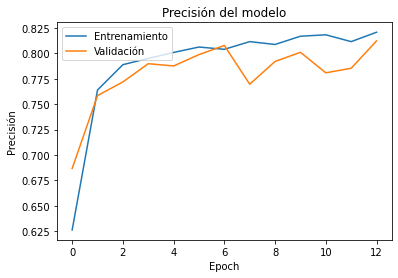

In [4]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento','Validación'], loc='upper left')
plt.savefig('Precision modelo.png', bbox_inches = "tight")
plt.show()

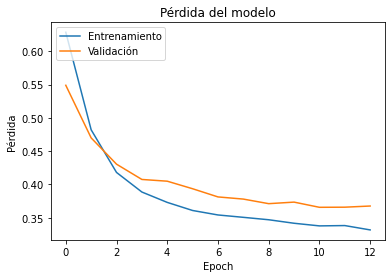

In [5]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento','Validación'], loc='upper left')
plt.savefig('Pérdida modelo.png', bbox_inches = "tight")
plt.show()

## Testeando el modelo

Después de haber entrenado el modelo, es tiempo de testear su precisión con datos que el modelo nunca ha visto.

Para esto utilizamos los datos de testeo que definimos más arriba.

In [6]:
perdida_test, precision_test = model.evaluate(inputs_test, targets_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.7879


In [7]:
print('\nPérdida del test: {0:.2f}. Precision del test: {1:.2f}%'.format(perdida_test, precision_test*100.))


Pérdida del test: 0.35. Precision del test: 78.79%


Finalmente, la precisión del modelo es cercano a un 80%.

Aún existe un margen para mejorar la precisión del modelo, sin embargo, para propósitos de demostración, este resultado es suficiente.